In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load dataset
df = pd.read_csv("Carbon Emission.csv")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Handle missing values
df = df.assign(**{'Vehicle Type': df['Vehicle Type'].fillna('Unknown')})

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Ensure numeric columns are correctly formatted
df = df.apply(pd.to_numeric, errors='coerce')

# Check for missing values after processing
print("\nMissing values after preprocessing:")
print(df.isnull().sum())

First 5 rows of the dataset:
    Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0  overweight  female  pescatarian            daily                  coal   
1       obese  female   vegetarian  less frequently           natural gas   
2  overweight    male     omnivore  more frequently                  wood   
3  overweight    male     omnivore      twice a day                  wood   
4       obese  female   vegetarian            daily                  coal   

      Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
0        public          NaN           often                   230   
1  walk/bicycle          NaN           often                   114   
2       private       petrol           never                   138   
3  walk/bicycle          NaN       sometimes                   157   
4       private       diesel           often                   266   

  Frequency of Traveling by Air  Vehicle Monthly Distance Km Waste Bag Size  \
0       

In [5]:
# Define features and target variable
X = df.drop(columns=['CarbonEmission'])  # Adjust column name if necessary
y = df['CarbonEmission']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.columns.tolist())

['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Body Type_obese', 'Body Type_overweight', 'Body Type_underweight', 'Sex_male', 'Diet_pescatarian', 'Diet_vegan', 'Diet_vegetarian', 'How Often Shower_less frequently', 'How Often Shower_more frequently', 'How Often Shower_twice a day', 'Heating Energy Source_electricity', 'Heating Energy Source_natural gas', 'Heating Energy Source_wood', 'Transport_public', 'Transport_walk/bicycle', 'Vehicle Type_diesel', 'Vehicle Type_electric', 'Vehicle Type_hybrid', 'Vehicle Type_lpg', 'Vehicle Type_petrol', 'Social Activity_often', 'Social Activity_sometimes', 'Frequency of Traveling by Air_never', 'Frequency of Traveling by Air_rarely', 'Frequency of Traveling by Air_very frequently', 'Waste Bag Size_large', 'Waste Bag Size_medium', 'Waste Bag Size_small', 'Energy efficiency_Sometimes', 'Energy efficiency_Yes', "Recycling_['

In [7]:
X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)

In [8]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [9]:
print(X_train.dtypes)

Monthly Grocery Bill                                              int64
Vehicle Monthly Distance Km                                       int64
Waste Bag Weekly Count                                            int64
How Long TV PC Daily Hour                                         int64
How Many New Clothes Monthly                                      int64
                                                                  ...  
Cooking_With_'Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer'     bool
Cooking_With_'Stove', 'Oven', 'Microwave'                          bool
Cooking_With_'Stove', 'Oven'                                       bool
Cooking_With_'Stove'                                               bool
Cooking_With_                                                      bool
Length: 66, dtype: object


In [10]:
# Clean column names to remove special characters
X.columns = X.columns.str.replace(r"[\[\]<]", "", regex=True)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

    print(f"{name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")



Training Random Forest model...
Random Forest Performance:
MAE: 230.91238499999997
MSE: 89686.90026075
R2 Score: 0.9137384037435672

Training Gradient Boosting model...
Gradient Boosting Performance:
MAE: 172.12034731290623
MSE: 52004.18716609816
R2 Score: 0.9499819462605607

Training XGBoost model...
XGBoost Performance:
MAE: 123.99299470520019
MSE: 26879.730161106425
R2 Score: 0.974146842956543


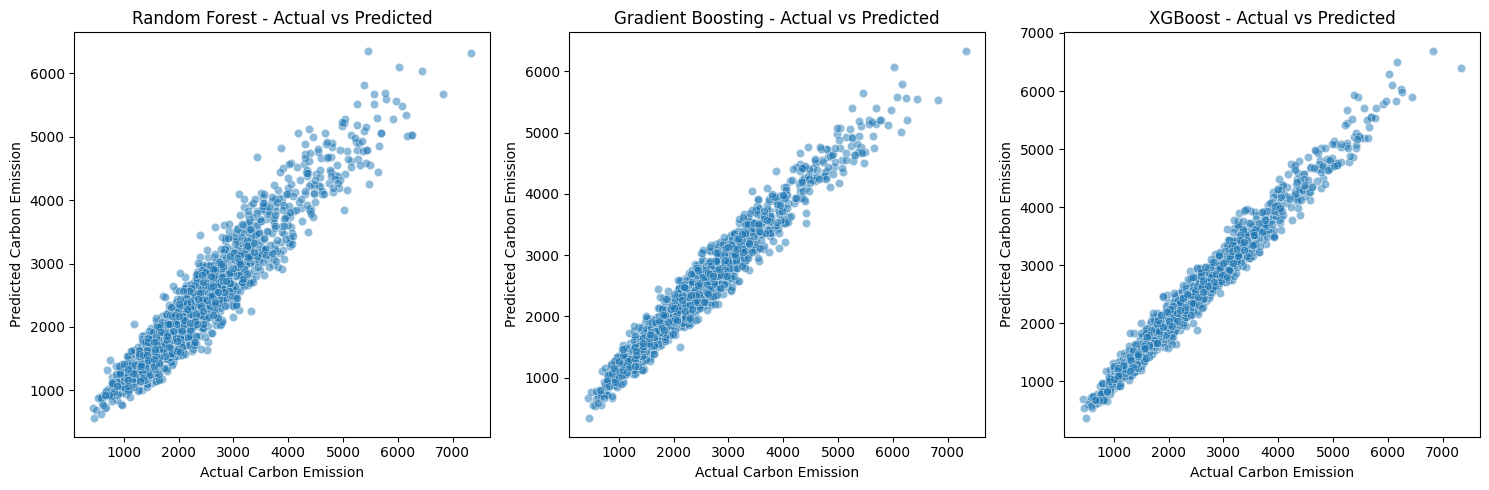

In [11]:
# Plot Actual vs Predicted values
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.xlabel("Actual Carbon Emission")
    plt.ylabel("Predicted Carbon Emission")
    plt.title(f"{name} - Actual vs Predicted")

plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

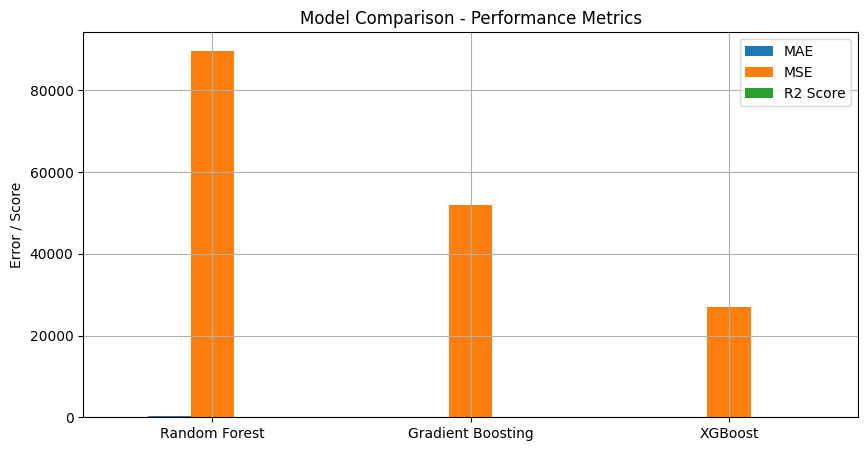

In [12]:
# Convert results dictionary to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Plot model performance
plt.figure(figsize=(10, 5))
results_df.plot(kind='bar', figsize=(10, 5))
plt.title("Model Comparison - Performance Metrics")
plt.ylabel("Error / Score")
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.grid()
plt.show()


### This code builds and tests three different machine learning models like Random Forest, Gradient Boosting, and XGBoost to predict carbon emissions based on a dataset. It starts by cleaning the data, handling missing values, and converting categorical information into numbers. The models are then trained using part of the data and tested on another part, with the results measured using error metrics like how far off the predictions are from actual emissions. Lastly, it visualizes how well each model performs, showing a comparison of actual vs. predicted values and a bar chart of the model scores.

## Coded by Meghana K